Dataset Loaded Successfully
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

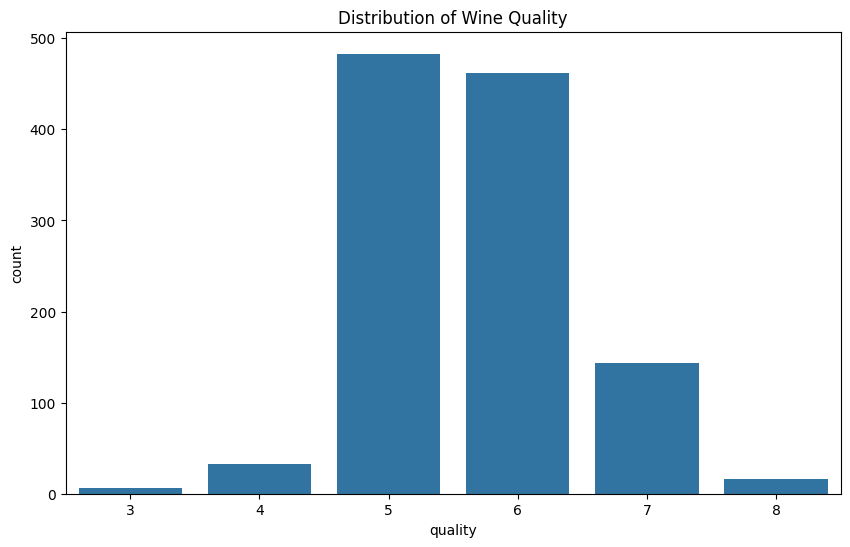

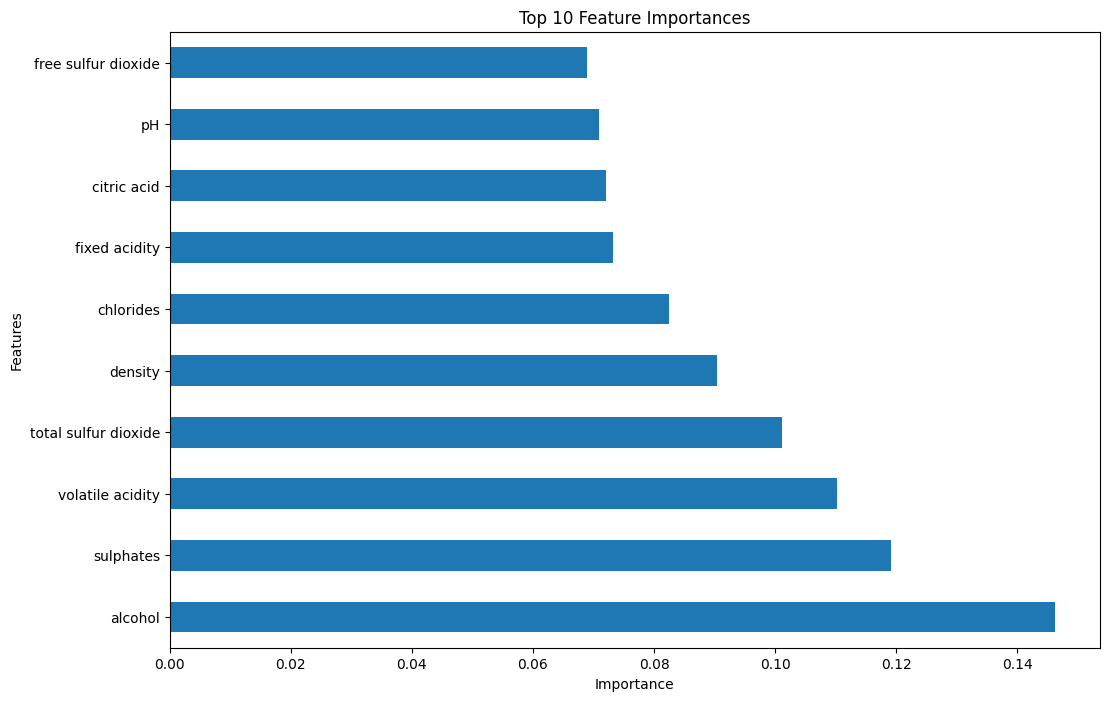

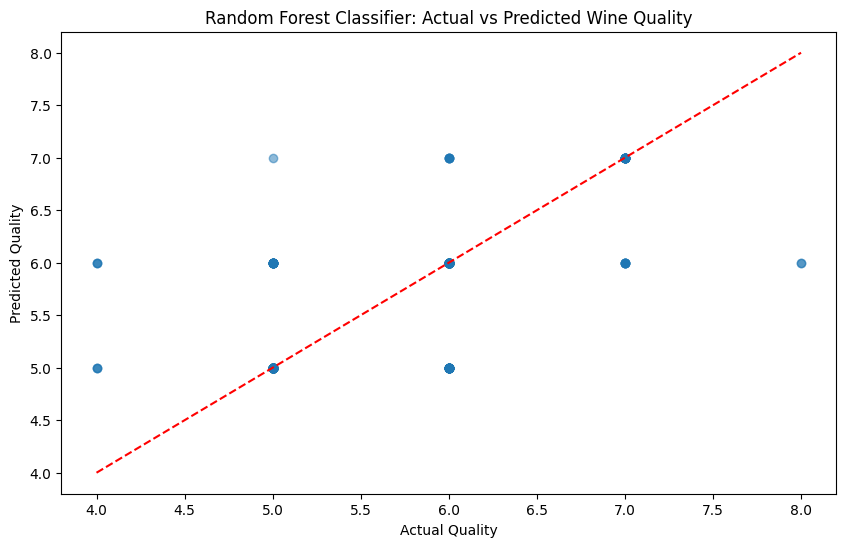

In [ ]:
#s1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#s2
url = '/content/drive/MyDrive/Infobyte/Task 2 Wine Quality Production/WineQT.csv'
data = pd.read_csv(url)
print("Dataset Loaded Successfully")
print(data.head())

#s3
print("Missing Values:\n", data.isnull().sum())
data.dropna(inplace=True)

#s4
X = data.drop(['quality', 'Id'], axis=1)
y = data['quality']

#s5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

#s6
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#s7
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

rf_results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})
print("\nRandom Forest Classifier - Actual vs Predicted Quality:\n", rf_results.head())

#s8
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
sgd_predictions = sgd_model.predict(X_test)

print("\nStochastic Gradient Descent Classifier")
print("Accuracy:", accuracy_score(y_test, sgd_predictions))
print(classification_report(y_test, sgd_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, sgd_predictions))

sgd_results = pd.DataFrame({'Actual': y_test, 'Predicted': sgd_predictions})
print("\nSGD Classifier - Actual vs Predicted Quality:\n", sgd_results.head())

#s9
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

print("\nSupport Vector Classifier")
print("Accuracy:", accuracy_score(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svc_predictions))

svc_results = pd.DataFrame({'Actual': y_test, 'Predicted': svc_predictions})
print("\nSVC Classifier - Actual vs Predicted Quality:\n", svc_results.head())

#s10
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()

#s11
plt.figure(figsize=(12, 8))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#s12
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Random Forest Classifier: Actual vs Predicted Wine Quality')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')